In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#在OpenCV中，图像默认是以BGR颜色模式存储的，
#这是因为早期的视频硬件使用这种顺序，而许多现代的图像处理和计算机视觉库也继承了这一传统。
#对于许多图形处理库（如PIL或Matplotlib）以及显示在屏幕上的图像，更常见的颜色模式是RGB

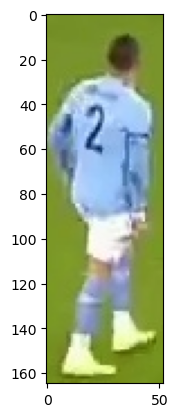

In [3]:
plt.imshow(image)
plt.show()

# take the top half of the image

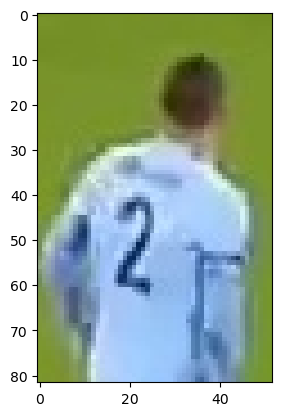

In [8]:
top_half_image = image[0:image.shape[0]//2,:]
plt.imshow(top_half_image)
plt.show()

# cluster the image into two clusters

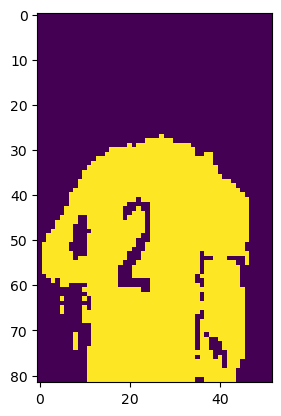

In [19]:
#reshape the image to 2D array
image_2d = top_half_image.reshape(-1,3)

kmeans =  KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [15]:
conners_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = sum(conners_clusters)//3
player_cluster = 1 -  non_player_cluster
print(f"Player cluster: {player_cluster}")
print(f"Non-player cluster: {non_player_cluster}")

Player cluster: 1
Non-player cluster: 0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([154.86896169, 187.99777901, 224.38200999])